### Importing the required Libraries


In [ ]:
# Data Wrangling
import pandas as pd

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# Data Visualization
import seaborn as sb
import matplotlib.pyplot as mplt

### Importing Dataset


Importing the dataset that has Similarity as a feature


In [ ]:
# Read Phishing Email Data Set with
phishing_dt = pd.read_csv("./Phishing_Email_Sim.csv")
phishing_dt.head()

### Processing the data for Model


Performing vectorization creating features using Email Text


In [90]:
vectorizer = TfidfVectorizer(max_features=200)

tfidf_matrix_email_text = vectorizer.fit_transform(phishing_dt["Email Text"])
tfidf_df_email_text = pd.DataFrame(
    tfidf_matrix_email_text.toarray(), columns=vectorizer.get_feature_names_out()
)

Creating final dataframe


In [91]:
phishing_dt_no_email = phishing_dt.drop(columns=["Email Text", "Email Text New"])

phishing_dt_final = pd.concat(
    [phishing_dt_no_email, tfidf_df_email_text], axis=1, ignore_index=False
)

phishing_dt_final.head()

,Unnamed: 0,Email Type,Phishing Similarity,00,000,01,10,11,12,15,...,within,work,workshop,world,would,www,year,you,your,½ï
0,0.0,Safe Email,0.011557,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,1.0,Safe Email,0.019583,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.149798,0.000000,0.0,0.091677,0.000000,0.0
2,2.0,Safe Email,0.005868,0.0,0.0,0.0,0.05916,0.0,0.138092,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.100780,0.000000,0.0
3,3.0,Phishing Email,0.020386,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.097227,0.0,0.183589,0.375098,0.0
4,4.0,Phishing Email,1.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


### Data Splitting


Splitting data into X and y


In [92]:
# Features and target
X = phishing_dt_final.drop(columns=["Email Type"])
y = phishing_dt_final["Email Type"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

### Random Forest Classifier


Training the Classifier Model


In [94]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Testing the Classifier Model


In [95]:
rf_y_pred = classifier.predict(X_test)

Model Accuracy


In [96]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
phishing_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

print(f"The Random Forest Classifier Model has an accuracy of {rf_accuracy}")

The Random Forest Classifier Model has an accuracy of 0.9437562772012053


Heatmap visualization of the Confusion Matrix

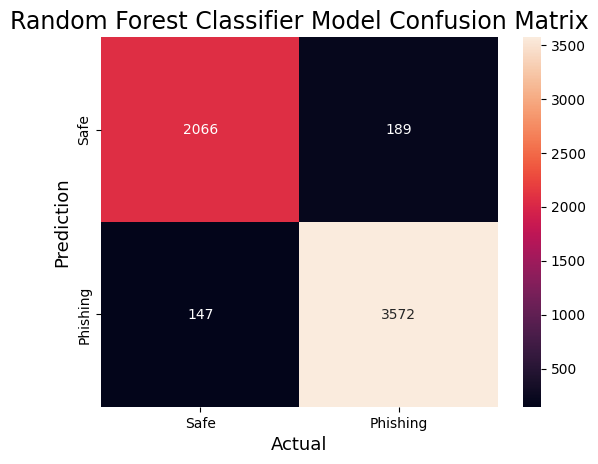

In [97]:
sb.heatmap(
    phishing_confusion_matrix,
    annot=True,
    fmt="g",
    xticklabels=["Safe", "Phishing"],
    yticklabels=["Safe", "Phishing"],
)
mplt.ylabel("Prediction", fontsize=13)
mplt.xlabel("Actual", fontsize=13)
mplt.title("Random Forest Classifier Model Confusion Matrix", fontsize=17)
mplt.show()

### SVM Model


Creating a SVM Model

In [98]:
model_svm = SVC(C=100, gamma="auto")

Training the SVM Model

In [99]:
model_svm.fit(X_train, y_train)

SVC(C=100, gamma='auto')

Testing the SVM Model

In [100]:
svm_y_pred = model_svm.predict(X_test)

Accuracy

In [101]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_confusion_matrix = confusion_matrix(y_test, svm_y_pred)

print(f'The SVM Model has an accuracy of {svm_accuracy}')

The SVM Model has an accuracy of 0.6327418814864413


Heatmap visualization of the Confusion Matrix

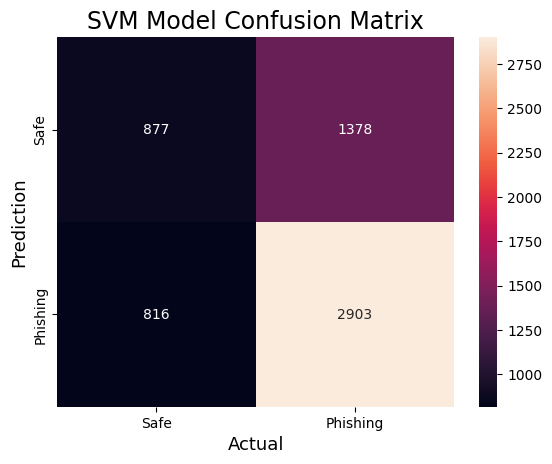

In [102]:
sb.heatmap(
    svm_confusion_matrix,
    annot=True,
    fmt="g",
    xticklabels=["Safe", "Phishing"],
    yticklabels=["Safe", "Phishing"],
)
mplt.ylabel("Prediction", fontsize=13)
mplt.xlabel("Actual", fontsize=13)
mplt.title("SVM Model Confusion Matrix", fontsize=17)
mplt.show()

### XGB Classifier

Defining KFold for the XGB Classifier

In [103]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

Creating a helper function

In [104]:
def print_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val, y_pred)}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

Creating X and y for the XGB Classifier

In [105]:
x_full_reset = phishing_dt_final.drop(columns=['Email Type']).reset_index(drop=True)
y_reset = y.reset_index(drop=True)

In [106]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Training and Testing the XGB Classifier

In [107]:
fold = 1
n_estim = 100
for train_index, val_index in kfold.split(x_full_reset):
  X_train, X_val = x_full_reset.iloc[train_index], x_full_reset.iloc[val_index]
  y_train, y_val = y_encoded[train_index], y_encoded[val_index]
  model = XGBClassifier(n_estimators=n_estim, learning_rate=0.1, max_depth=4, colsample_bytree=0.2, n_jobs=-1, random_state=42,enable_categorical=True)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  print_report(y_val, y_pred, fold)
  xgb_confusion_matrix = confusion_matrix(y_val, y_pred)
  fold += 1

Fold: 1
Accuracy Score: 0.9317867992267329
Confusion Matrix: 
 [[1261  123]
 [ 124 2113]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1384
           1       0.94      0.94      0.94      2237

    accuracy                           0.93      3621
   macro avg       0.93      0.93      0.93      3621
weighted avg       0.93      0.93      0.93      3621

Fold: 2
Accuracy Score: 0.9295580110497238
Confusion Matrix: 
 [[1258  116]
 [ 139 2107]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1374
           1       0.95      0.94      0.94      2246

    accuracy                           0.93      3620
   macro avg       0.92      0.93      0.93      3620
weighted avg       0.93      0.93      0.93      3620

Fold: 3
Accuracy Score: 0.930939226519337
Confusion Matrix: 
 [[1314  127]
 [ 123 2056]]
Classification Report: 
   

Heatmap visualization of the Confusion Matrix

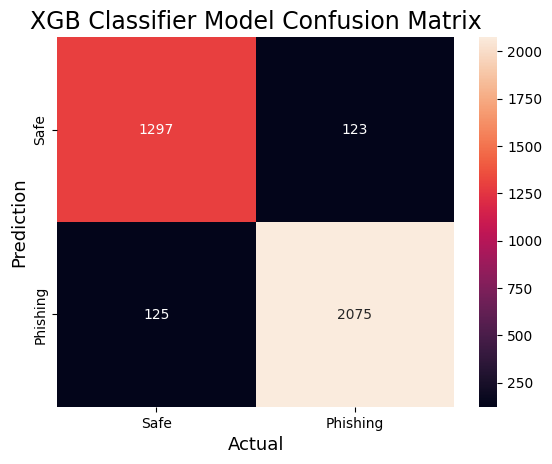

In [108]:
sb.heatmap(
    xgb_confusion_matrix,
    annot=True,
    fmt="g",
    xticklabels=["Safe", "Phishing"],
    yticklabels=["Safe", "Phishing"],
)
mplt.ylabel("Prediction", fontsize=13)
mplt.xlabel("Actual", fontsize=13)
mplt.title("XGB Classifier Model Confusion Matrix", fontsize=17)
mplt.show()